In [1]:
%matplotlib notebook

In [2]:
# Close a hole in this notebook's Dockerfile

import sys
!{sys.executable} -m pip install torchmetrics

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
import torch

import warnings

In [4]:
from pacsmodeling import (
    PACSDatasetMultipleDomain, PACSDatasetSingleDomain,
    PACSSamplerSingleDomainPerBatch
)

In [5]:
def plot_n_images_from_domain(domain, n, display_lag, data_type=int, start_index=0):
    fig, ax = plt.subplots()

    plt.ion()
    plt.show()
    for i in range(start_index, start_index + n): 
        x,y = domain[i]
        im_to_show = np.transpose(x.astype(data_type), (1,2,0))
        ax.imshow(im_to_show)  
        plt.gcf().canvas.draw()
        time.sleep(display_lag)

In [6]:
def plot_batch(batch, display_lag, data_type=float):
    fig, ax = plt.subplots()

    plt.ion()
    plt.show()
    
    X = batch[0].numpy()
    
    for i in range(len(X)): 
        x = X[i]
        im_to_show = np.transpose(x.astype(data_type), (1,2,0))
        ax.imshow(im_to_show)  
        plt.gcf().canvas.draw()
        time.sleep(display_lag)

In [7]:
def plot_indices_from_domain(domain, indices, display_lag, data_type=int):
    fig, ax = plt.subplots()

    plt.ion()
    plt.show()
    
    for i in indices: 
        x,y = domain[i]
        im_to_show = np.transpose(x.astype(data_type), (1,2,0))
        ax.imshow(im_to_show)  
        plt.gcf().canvas.draw()
        time.sleep(display_lag)

In [7]:
mix_dom = PACSDatasetMultipleDomain(
    "art_painting", "train", normalize=False
)

<IPython.core.display.Javascript object>


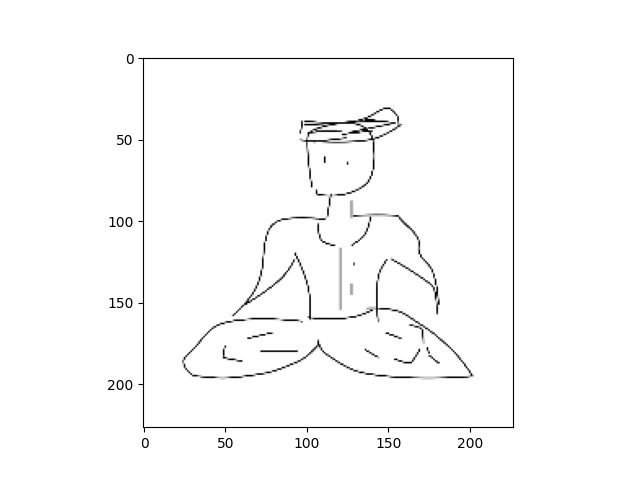

In [8]:
plot_n_images_from_domain(mix_dom, 33, 0.25, int, 7000)

### Sanity check the split indices, domain names, and split name properties.

In [8]:
mix_dom.split_indices

[2107, 3606, 7137]

In [9]:
mix_dom.domain_names

['cartoon', 'photo', 'sketch']

In [10]:
mix_dom.split_name

'train'

## Sampler Testing

In [28]:
from torch.utils.data import (
    Sampler, SequentialSampler, BatchSampler
)

In [29]:
seq = SequentialSampler(
    np.arange(50)
)

In [30]:
bs = BatchSampler(seq, 32, True)

In [31]:
mix_dom.split_indices, mix_dom.cumulative_sizes

([2107, 3606, 7137], [2107, 3606, 7137])

In [32]:
PS = PACSSamplerSingleDomainPerBatch(
    mix_dom, 10, False
)

In [33]:
PSI = iter(PS)

In [40]:
batch_idcs = next(PSI)

batch_idcs

tensor([5996, 5171, 5434, 6252, 4768, 3801, 4310, 6515, 3715, 6454])

<IPython.core.display.Javascript object>


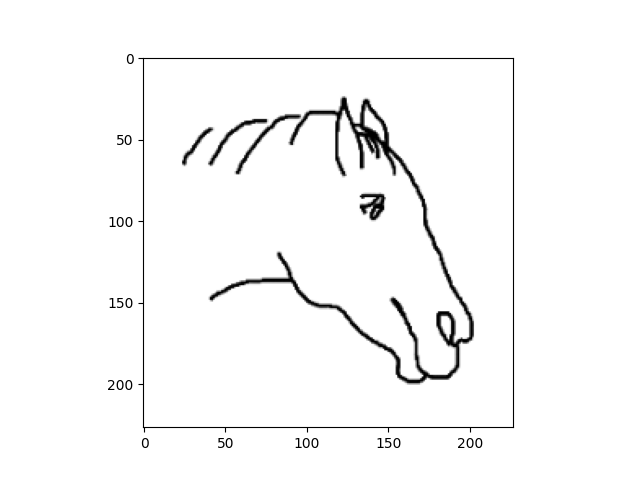

In [41]:
plot_indices_from_domain(mix_dom, batch_idcs, 0.1, int)

In [22]:
batch_idcs.shape

torch.Size([100])

In [24]:
mix_dom

ValueError: too many values to unpack (expected 2)

In [18]:
len(mix_dom)

7137

In [19]:
for i in range(len(mix_dom)):
    mix_dom[i]

In [20]:
C = torch.tensor([3262, 3536, 2542, 3181, 2879, 3026, 2949, 2737, 3425, 3073, 2220, 3117, 2514, 2849, 2791, 2812, 3150, 3013, 2219, 2864, 3056, 2646, 3261, 3168, 2895, 3019, 3267, 3188, 2524, 3529, 2397, 3175])

C

tensor([3262, 3536, 2542, 3181, 2879, 3026, 2949, 2737, 3425, 3073, 2220, 3117,
        2514, 2849, 2791, 2812, 3150, 3013, 2219, 2864, 3056, 2646, 3261, 3168,
        2895, 3019, 3267, 3188, 2524, 3529, 2397, 3175])

In [21]:
for idx in C:
    print(type(idx), idx)
    X, y = mix_dom[idx]
    
    print(X.shape)

<class 'torch.Tensor'> tensor(3262)
(3, 227, 227)
<class 'torch.Tensor'> tensor(3536)
(3, 227, 227)
<class 'torch.Tensor'> tensor(2542)
(3, 227, 227)
<class 'torch.Tensor'> tensor(3181)
(3, 227, 227)
<class 'torch.Tensor'> tensor(2879)
(3, 227, 227)
<class 'torch.Tensor'> tensor(3026)
(3, 227, 227)
<class 'torch.Tensor'> tensor(2949)
(3, 227, 227)
<class 'torch.Tensor'> tensor(2737)
(3, 227, 227)
<class 'torch.Tensor'> tensor(3425)
(3, 227, 227)
<class 'torch.Tensor'> tensor(3073)
(3, 227, 227)
<class 'torch.Tensor'> tensor(2220)
(3, 227, 227)
<class 'torch.Tensor'> tensor(3117)
(3, 227, 227)
<class 'torch.Tensor'> tensor(2514)
(3, 227, 227)
<class 'torch.Tensor'> tensor(2849)
(3, 227, 227)
<class 'torch.Tensor'> tensor(2791)
(3, 227, 227)
<class 'torch.Tensor'> tensor(2812)
(3, 227, 227)
<class 'torch.Tensor'> tensor(3150)
(3, 227, 227)
<class 'torch.Tensor'> tensor(3013)
(3, 227, 227)
<class 'torch.Tensor'> tensor(2219)
(3, 227, 227)
<class 'torch.Tensor'> tensor(2864)
(3, 227, 227)


In [22]:
len(C)

32

## ConcatDataset Testing

In [23]:
sketch = PACSDatasetSingleDomain("sketch", "train")

In [24]:
cartoon = PACSDatasetSingleDomain("cartoon", "train")

In [25]:
photo = PACSDatasetSingleDomain("photo", "train")

In [26]:
C = torch.utils.data.ConcatDataset([sketch, cartoon, photo])

In [27]:
C

In [28]:
X, y = C[3252]

In [29]:
C.cumulative_sizes

[3531, 5638, 7137]

In [30]:
len(C)

7137

# Results File 

In [44]:
import os
from pathlib import Path

In [46]:
loadpath = Path(os.getcwd())/"results/sds/cm-random-seed-55-sds.pt"
loadpath

PosixPath('/workspace/home/matthew.almeida001/Workspace-data/PACS_Sampling_Experiments/results/sds/cm-random-seed-55-sds.pt')

In [47]:
RT = torch.load(loadpath)

In [49]:
RT.reshape((7,7))

tensor([[ 42.,   5.,  73.,  18., 144.,  73.,  24.],
        [  5.,   6.,  44.,   4., 113.,  76.,   7.],
        [  5.,   0., 150.,  12.,  88.,  25.,   5.],
        [  1.,   2.,  36.,  28.,  70.,  43.,   4.],
        [  2.,   0.,  22.,   1., 144.,  28.,   4.],
        [  1.,   0.,  39.,  15.,  97., 142.,   1.],
        [ 11.,   5.,  94.,   8., 171.,  77.,  83.]])

# Investigate issue with --use_sds flag

Bug report: Was encountering issue where training with the --use_sds flag OFF (so normal training) resulted in a model doing no better than random guessing (~ 14% over 7 classes). Below code visualizes the examples that came out of the dataloaders and revealed quickly that the shuffler was off during normal training and so the dataloader would only return the same batches of examples over and over at each epoch. Shuffling was built into the custom sds Sampler so sds models did not have this issue.

In [8]:
from argparse import Namespace

from pacsmodeling import PACSLightning

In [9]:
args_sds = Namespace(
    use_sds=True,
    n_classes=7,
    max_epochs=5,
    domain_name="art_painting",
    batch_size=32,
    drop_last=False,
    learning_rate=0.05,
    dataloader_workers=0
)

args_no_sds = Namespace(
    use_sds=False,
    n_classes=7,
    max_epochs=5,
    domain_name="art_painting",
    batch_size=32,
    drop_last=False,
    learning_rate=0.05,
    dataloader_workers=0
)

In [10]:
pl_sds = PACSLightning(args_sds)

pl_sds.setup(None)

In [11]:
pl_no_sds = PACSLightning(args_no_sds)

pl_no_sds.setup(None)

In [22]:
sds_dl = pl_sds.train_dataloader()

Using single domain sampling...


In [24]:
no_sds_dl = pl_no_sds.train_dataloader()

sds_itr= iter(sds_dl)

In [27]:
sds_batch = next(sds_itr)

<IPython.core.display.Javascript object>


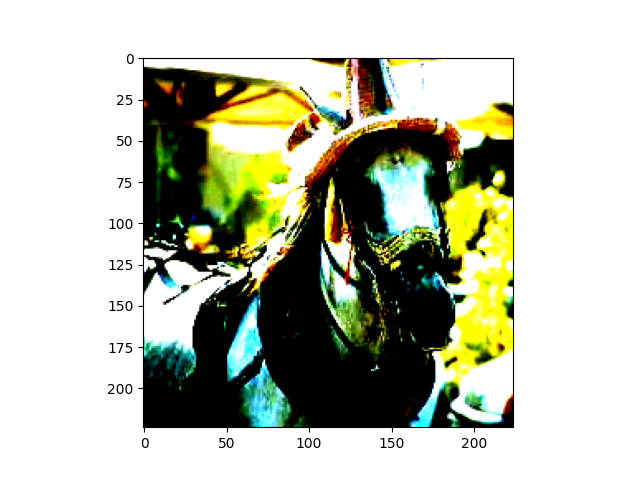

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

In [28]:
plot_batch(
    sds_batch, 0.05
)

In [31]:
no_sds_itr = iter(no_sds_dl)

no_sds_batch = next(no_sds_itr)

<IPython.core.display.Javascript object>


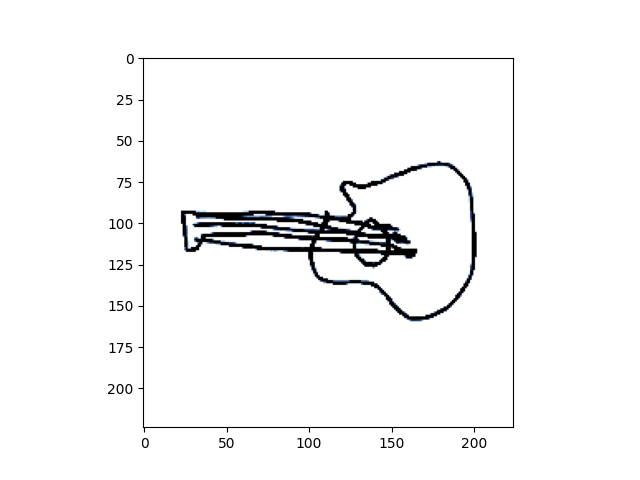

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

In [32]:
plot_batch(
    no_sds_batch, 0.05
)